In [2]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [6]:
import pandas as pd

In [8]:
df=pd.read_csv("student_marks.csv")

In [9]:
df

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [10]:
df.shape

(200, 2)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [12]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


In [13]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [14]:
df2=df.fillna(df.study_hours.mean())

In [15]:
df2

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19
...,...,...
195,7.530000,81.67
196,8.560000,84.68
197,8.940000,86.75
198,6.600000,78.05


In [31]:
X=df2.drop("student_marks",axis=1)
Y=df2.student_marks

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2)

In [34]:
Xtrain

,study_hours
191,5.22
95,6.09
177,5.79
106,5.34
68,5.07
...,...
199,8.35
152,8.08
178,8.42
137,5.14


In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lr=LinearRegression()
lr.fit(Xtrain,Ytrain)

LinearRegression()

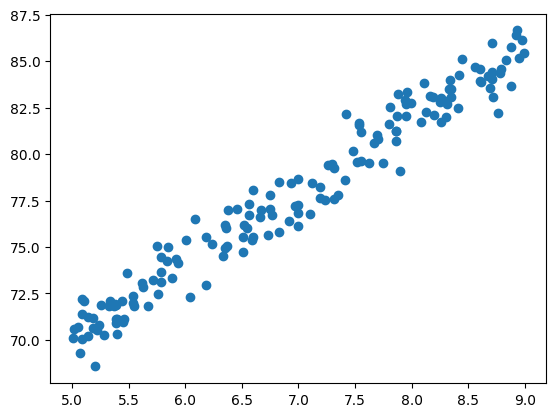

In [42]:
plt.scatter(Xtrain,Ytrain)

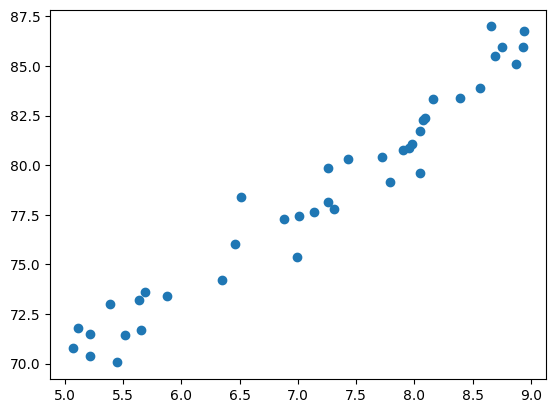

In [43]:
plt.scatter(Xtest,Ytest)

In [44]:
Ytest

71     71.79
186    85.10
162    79.17
63     80.43
13     80.76
130    73.19
176    85.96
174    73.02
53     71.45
11     83.88
51     77.77
118    73.61
185    79.63
182    86.99
86     73.40
126    76.02
127    77.65
141    80.31
44     82.38
184    71.50
194    74.24
99     82.30
84     77.29
189    79.87
173    70.40
125    85.95
156    83.37
65     70.06
21     83.36
113    80.86
46     77.46
96     75.39
55     85.48
179    78.17
134    78.39
110    81.08
197    86.75
59     71.70
87     81.74
167    70.79
Name: student_marks, dtype: float64

In [45]:
lr.predict(Xtest)

array([70.63026889, 85.22343258, 81.03177918, 80.76009794, 81.45870684,
       72.68728399, 85.45630221, 71.71699385, 72.22154472, 84.02027281,
       79.16882211, 72.88134202, 82.04088093, 84.40838886, 73.61876252,
       75.86983564, 78.50902482, 79.63456138, 82.19612735, 71.05719656,
       75.44290798, 82.11850414, 77.49992308, 78.97476409, 71.05719656,
       84.75769331, 83.36047551, 71.94986348, 82.46780859, 81.65276487,
       78.00447395, 77.94993867, 84.52482368, 78.97476409, 76.06389367,
       81.76919969, 85.49511382, 72.72609559, 82.04088093, 70.47502247])

In [48]:
pd.DataFrame(np.c_[Xtest,Ytest,lr.predict(Xtest)],columns=["studyHours","OrginalValue","PredictedValue"])

,studyHours,OrginalValue,PredictedValue
0,5.110000,71.79,70.630269
1,8.870000,85.10,85.223433
2,7.790000,79.17,81.031779
3,7.720000,80.43,80.760098
4,7.900000,80.76,81.458707
5,5.640000,73.19,72.687284
6,8.930000,85.96,85.456302
7,5.390000,73.02,71.716994
8,5.520000,71.45,72.221545
9,8.560000,83.88,84.020273


In [51]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [54]:
lr.score(Xtrain,Ytrain)

0.9597608143586174

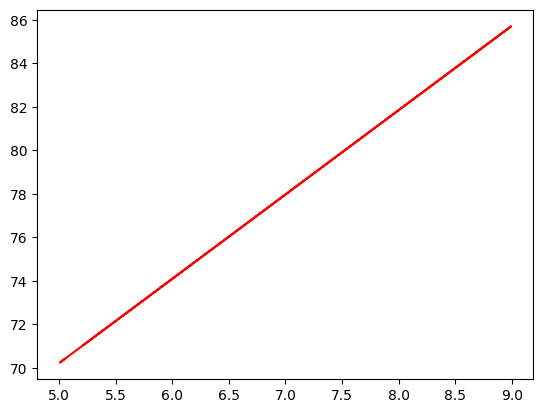

In [56]:
plt.plot(Xtrain,lr.predict(Xtrain),'r-')

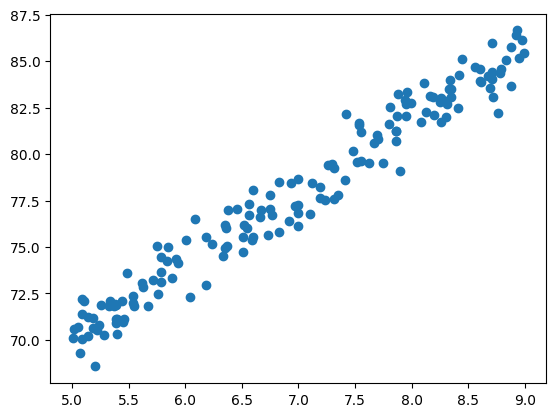

In [57]:
plt.scatter(Xtrain,Ytrain)

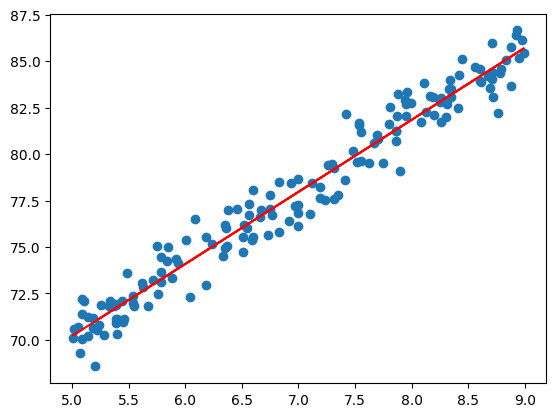

In [58]:
plt.scatter(Xtrain,Ytrain)
plt.plot(Xtrain,lr.predict(Xtrain ),'r-')

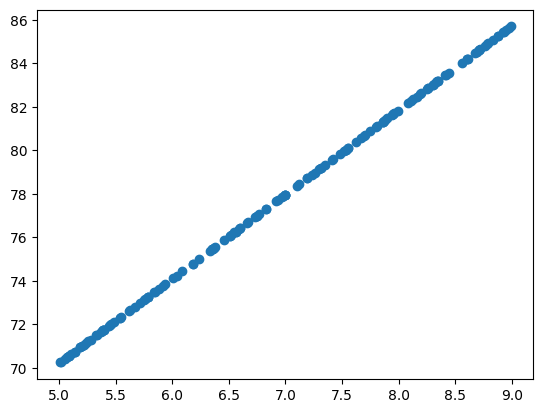

In [60]:
plt.scatter(Xtrain,lr.predict(Xtrain ))